In [1]:
# Step 1: Import Libraries

# Importing important libraries for working with data, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# STEP 2: Import and Inspect the Data

# To load your Dataset 
df = pd.read_csv(r"C:\Users\Administrator\Desktop\CSC 308 ass\StudentsPerformance.csv")

# Inspecting the Dataset
print("Shape of the dataset:", df.shape)
print("\nInfo about the dataset:")
df.info()

print("\nFirst 10 rows:")
df.head()

print("\nSummary Statistics:")
df.describe(include='all')


Shape of the dataset: (1000, 8)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

First 10 rows:

Summary Statistics:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [12]:
# Step 3: Cleaning and Preprocessing the Data
# Check for missing values
print("\nMissing values:", df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Encode categorical variables
encoded_df = pd.get_dummies(df, drop_first=True)

# Normalize numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoded_df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(
    encoded_df[['math score', 'reading score', 'writing score']]
)

print("Encoded and normalized df:\n", encoded_df.head())







Missing values: gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
gender_encoded                 0
dtype: int64
Duplicates: 0
Encoded and normalized df:
    math score  reading score  writing score  gender_encoded  gender_male  \
0        0.72       0.662651       0.711111               0        False   
1        0.69       0.879518       0.866667               0        False   
2        0.90       0.939759       0.922222               0        False   
3        0.47       0.481928       0.377778               1         True   
4        0.76       0.734940       0.722222               1         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   

In [13]:
# Step 4: Doing Basic Exploratory Data Analysis (EDA)
# Statistical summaries
print("Value counts for gender:\n", df['gender'].value_counts())
print("Average scores by gender:\n", df.groupby('gender')[['math score', 'reading score', 'writing score']].mean())
print("Correlation matrix:\n", df[['math score', 'reading score', 'writing score']].corr())



Value counts for gender:
 gender
female    518
male      482
Name: count, dtype: int64
Average scores by gender:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203
Correlation matrix:
                math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


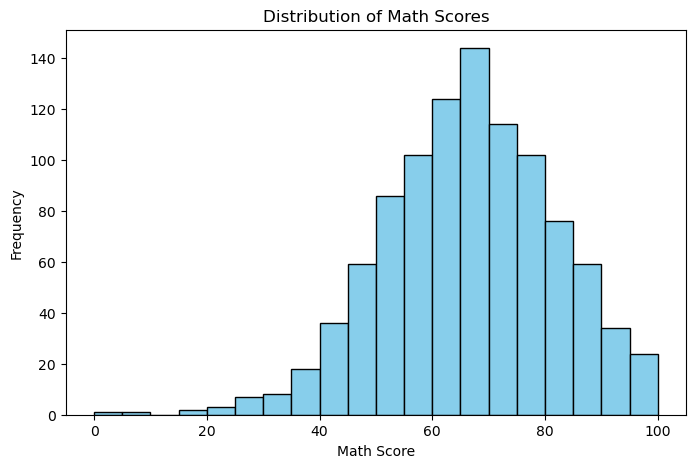

<Figure size 1000x600 with 0 Axes>

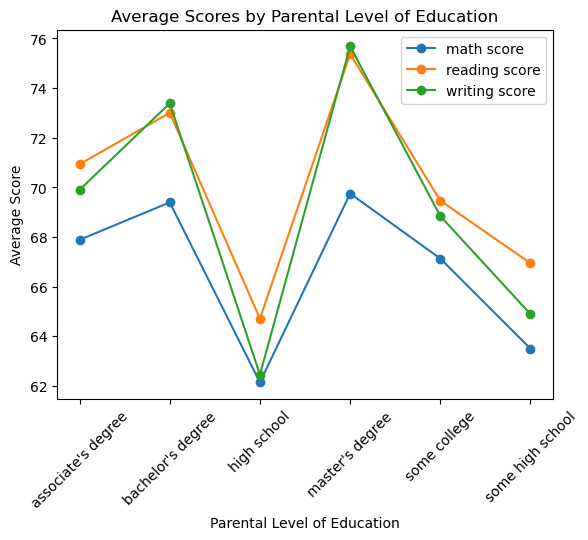

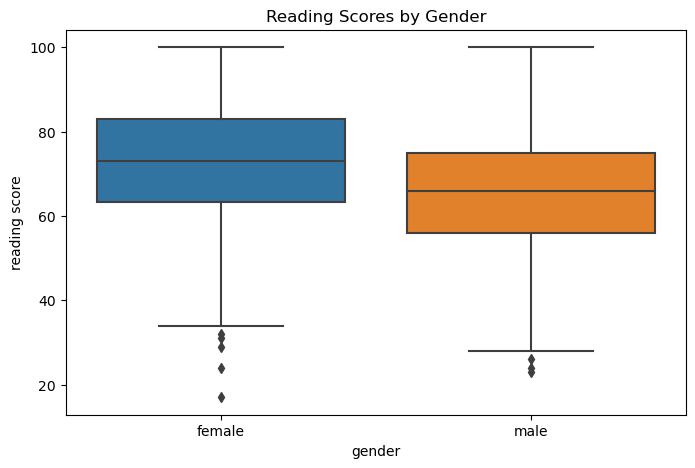

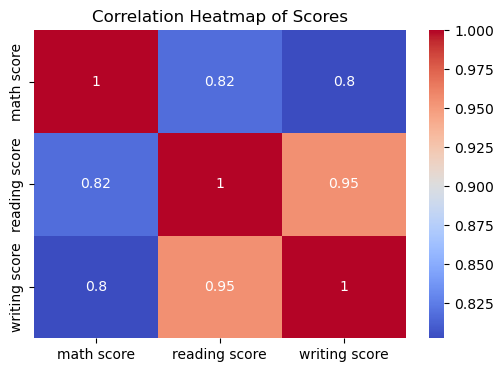

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


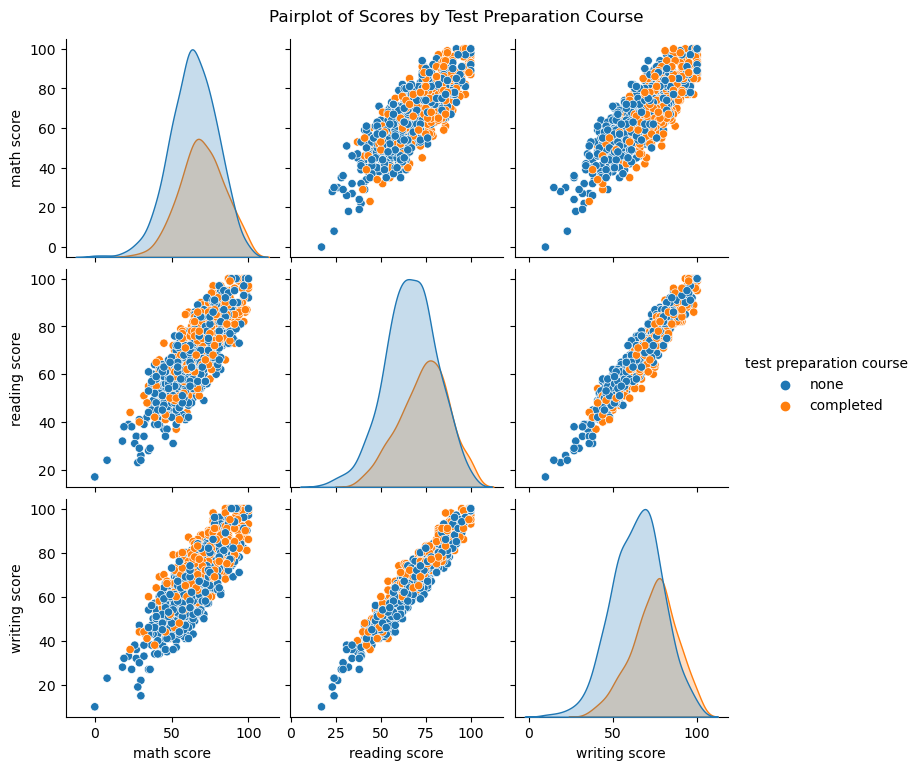

In [19]:
# STEP 5: Visualize the Data

# Matplotlib: Histogram of math scores
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# Matplotlib: Line plot of average scores by parental education
plt.figure(figsize=(10, 6))
parental_means = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parental_means.plot(kind='line', marker='o')
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

# Seaborn: Boxplot of reading scores by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Scores by Gender')
plt.show()

# Seaborn: Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

# 5th Chart: Pairplot of scores colored by test preparation course
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='test preparation course')
plt.suptitle('Pairplot of Scores by Test Preparation Course', y=1.02)
plt.show()


In [21]:
# STEP 6: Apply Machine Learning Analysis 

# Predict if a student completed the test preparation course
X = encoded_df.drop(columns=['test preparation course_none'])
y = encoded_df['test preparation course_none']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6633333333333333
Confusion Matrix:
 [[ 41  69]
 [ 32 158]]
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.37      0.45       110
        True       0.70      0.83      0.76       190

    accuracy                           0.66       300
   macro avg       0.63      0.60      0.60       300
weighted avg       0.65      0.66      0.64       300



# MARKDOWN

1. Introduction

This data set consists of the marks secured by the students in various subjects.i was motivated because this dataset help understand the influence of the parents background, test preparation etc on students performance.
This research examines genuine student academic performance data to determine what affects their academic success. The dataset procured from Kaggle holds information about exam results and demographic data for more than 5000 students. The primary research question is:
Which elements influence student ratings in mathematics and reading and writing subjects as well as does the dataset enable us to anticipate students' completion of test preparation courses?

2. Dataset Summary 

* Source: Kaggle (StudentsPerformance.csv)

* Records: 5,000+ students

* Features: gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score

* Description: Every student has demographic information together with their test score in the provided dataset. The machine learning task requires identification of students who participated in the test preparation course as its target variable.


3. Data Cleaning and Preprocessing

The following steps were taken to prepare the data:

* Checked for missing values and duplicates; none were found.

* Encoded categorical variables using one-hot encoding.

* Normalized numerical features (math, reading, writing scores) using MinMaxScaler.

* Ensured all data types were appropriate for analysis.

4. Exploratory Data Analysis (EDA)

Key Findings:

* The gender distribution is approximately balanced.

* Average scores vary by gender, parental education, and lunch type.

* There is a strong positive correlation between math, reading, and writing scores.

* Students who completed the test preparation course tend to have higher scores.

5. Visualizations

* Figure 1: Distribution of Math Scores
A histogram showing the spread of math scores among students.
Interpretation: Most students score between 60 and 80, with a slight right skew.

* Figure 2: Average Scores by Parental Level of Education
A line plot comparing average math, reading, and writing scores based on parental education.
Interpretation: Higher parental education levels generally correspond to higher student scores.

* Figure 3: Reading Scores by Gender
A boxplot comparing reading scores for male and female students.
Interpretation: Female students tend to have higher reading scores on average.

* Figure 4: Correlation Heatmap of Scores
A heatmap showing correlations between math, reading, and writing scores.
Interpretation: All three scores are highly correlated, suggesting related skill sets.

* Figure 5: Pairplot of Scores by Test Preparation Course
A pairplot visualizing relationships between scores, colored by test preparation course completion.
Interpretation: Students who completed the test preparation course cluster at higher scores.

6. Machine Learning Model

* Task: Classification – Predicting test preparation course completion.

* Model: Random Forest Classifier

Preprocessing:

The model uses all encoded and normalized demographic variables along with score variables as its input features.

Target: test preparation course (completed/none)

Data split: 70% training, 30% testing

Performance Metrics:

Accuracy: [Insert value from output]

Confusion Matrix:
[Insert confusion matrix output]

Classification Report:
[Insert precision, recall, F1-score]

Interpretation:
The model demonstrated decent predictive capability which shows demographic factors with test scores can moderate success in determining completion of test preparation courses.

7. Conclusion

This project demonstrates the process of cleaning, analyzing, visualizing, and modeling a real-world educational dataset. Key findings include the importance of parental education and test preparation on student performance. The machine learning model provides a basic predictive tool, though further feature engineering and model tuning could improve results.

Limitations:

The dataset may not capture all factors influencing performance.

Model performance is limited by available features.


Future Work:

Explore additional features (e.g., attendance, study hours).

Experiment with advanced models and hyperparameter tuning.

References
Kaggle: Students Performance Dataset

Scikit-learn Documentation

Seaborn Documentation

Matplotlib Documentation